# Test of WDM+HOD in Downhill Gradient

The idea of this notebook is to perform tests which assess the usefulness of using certain regimes of the 2PCF for detecting WDM. We use the modeling developed in other notebooks to achive this. 

In short, we look at 3 different WDM masses: something on the very edge of reasonable, something interesting, and something more difficult: say 2keV, 3.3keV and 7keV. For each mass, we choose a fiducial HOD, where we constrain $M_1$ and $\alpha$ to be consistent with some empirical relation with $M_{min}$ (so effectively we have a 1D space to work in). For that fiducial HOD, use downhill-gradient to find the best-fit HOD in CDM (where we use reasonable gaussian priors on the parameters, given the inputs), and then find the $\chi^2/$d.o.f. for that result. If it is < 1 (for say $\sigma = 10$%), then choose a smaller $M_{min}$ and so on until we get something which is a bad model, ie. could be "detected" at that $\sigma$-level.

We do each regime separately, but then also try the low- and mid- regime together.

## General Imports and Definitions

In [1]:
%pylab inline
from halomod.wdm import HaloModelWDM, ProjectedCFWDM
from hmf.fitting.fit import Minimize
from hmf.fitting.fit import Normal, Uniform

Populating the interactive namespace from numpy and matplotlib


/Users/Steven/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
kwargs = dict(scale_dependent_bias="Tinker_SD05",takahashi=True,mf_fit="SMT",z=0,fsig_params={"a":1},
                filter="SharpK",filter_params={"c":2.5},cm_relation="DuffyWDM",hod_model="Zehavi05",
                hod_params={"alpha":1.214,"M_1":13.396,"M_min":12.0478},halo_exclusion="NgMatched_",
                _hc_spectrum="nonlinear",wdm_mass=0.1,bias_model="ST",bias_params={"q":1.0})

In [3]:
hm = HaloModelWDM(**kwargs)
wp = ProjectedCFWDM(**kwargs)

## Empirical Relations for HOD

We use, for example, the relations from the SDSS data from Zehavi+11, to model both $M_1$ and $\alpha$ on $M_{min}$. This will be somewhat dependent on redshift and selection type, so is not completely general here. However, this should serve as a 'typical' example, and perhaps better selections can be made.

First, we input the data from Zehavi+11:

In [4]:
mmin_zehavi = np.array([14.06,13.38,12.78,12.14,11.83,11.57,11.45,11.33,11.18])
m1_zehavi = np.array([14.85,14.29,13.8,13.44,13.08,12.87,12.64,12.51,12.43])
alpha_zehavi = np.array([1.35,1.09,1.15,1.15,1.0,0.99,1.02,1.02,1.04])

Now, try find a relation between them:

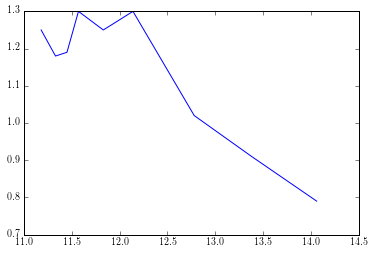

In [6]:
plot(mmin_zehavi,m1_zehavi-mmin_zehavi)

Given the uncertainty in this relationship, it's probably best just to leave the ratio constant for now, so perhaps using $M_1/M_{min} = 1.2$ (see Skibba+15 for how this might evolve with redshift). For $\alpha$:

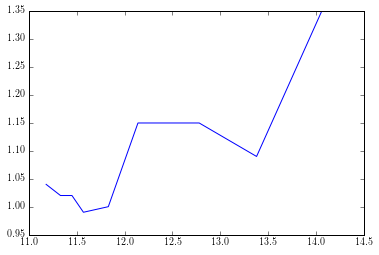

In [7]:
plot(mmin_zehavi,alpha_zehavi)

It seems like it has 'bottomed out' at about $\alpha = 1.0$, so let's just use that value (since we'll really be considering small $M_{min}$).

In [4]:
def get_hod(mmin,z):
    return {"M_min":mmin,"M_1":mmin+1.2-z/10.,"alpha":1.0}

## Large-Scale

We want to use scales which we somewhat trust, centering on around the BAO peak, which we know should exhibit the feature that we care about. We use a reasonable number of bins, and the real-space 2PCF.

In [92]:
hm.rlog=False
hm.update(rmin=70.0,rmax=110.0,rnum=40.0)

The 2-halo term, on large scales, is merely

$$	\xi_{gg}^{2h}(r) = b_{\rm eff}^2 \xi_m(r), $$

where 

$$	b_{\rm eff} = \frac{1}{n_g'}\int n(m) N_t(m) b(m) dm. $$

The reasons for this are that at large scales, $u(k|m) \rightarrow 1$, halo exclusion effects are non-existent, and the scale-dependence of the bias is negligible, since $\xi_m(r) \ll 1$.

Thus all effects of the HOD are sequestered into a single parameter (and indeed the effects of WDM on the halo model components). This is why HOD analyses are typically not performed solely on large scales -- the parameters are entirely unidentifiable. 

Conversely, WDM also affects $\xi_m(r)$, and so we may be able to identify features in the ratio of the WDM to CDM matter correlation. We show the correlations and this ratio for our three fiducial WDM candidates, at $z=3$, in the first figure below. Clearly, the effect of reducing the mass of the WDM particle is to increase the distance between trough and peak of the BAO feature. This effect is amplified with increasing redshift, as we shall see. Interestingly, reducing the WDM mass to very low values ($\sim 0.1$ keV) begins to *reduce* the distance between the trough and peak, and gives a broadened peak. This corresponds the known effect on the BAO from smoothing the power spectrum at a given scale.

An appropriate test in this context then, given that the scale-independent bias can be reproduced by some combination of HOD parameters, is merely to assess the ratio of the peak-trough distance, $\Delta \xi_{\rm BAO}$ in WDM to that in CDM for our fiducial candidates, over a range of redshifts. We show the results of this test in the second figure below. None of our fiducial models are detectable at the 10\% level below $z\sim4$. However, at $z=4$, the extreme-case 2 keV model becomes detectable at the 10\% level, and likewise for the 3.3 keV model at $z=5$. 

Note that these results derive from the approximation of the halo-centre power spectrum. As we have mentioned, the use of the WDM-modified nonlinear power from HALOFIT, though tested to some degree  and found to be appropriate for $k<1$ Mpc$h^{-1}$, is not a fundamentally WDM-motivated form. It remains to be seen if it is accurate on BAO scales when transformed to real-space. Potential future tests of this kind must take this into consideration.

0 2.0 1.00197246765
0 3.3 1.0005676233
0 7.0 1.00008749613
1 2.0 1.00724114041
1 3.3 1.00208163283
1 7.0 1.00032074952
2 2.0 1.02293967991
2 3.3 1.00659266995
2 7.0 1.00101573097
3 2.0 1.06475170828
3 3.3 1.01880812529
3 7.0 1.00290834896
4 2.0 1.15496816984
4 3.3 1.04762646028
4 7.0 1.00751356691
5 2.0 1.16031429373
5 3.3 1.10871179968
5 7.0 1.01847312079
6 2.0 1.2814988045
6 3.3 1.1209663357
6 7.0 1.0461237984


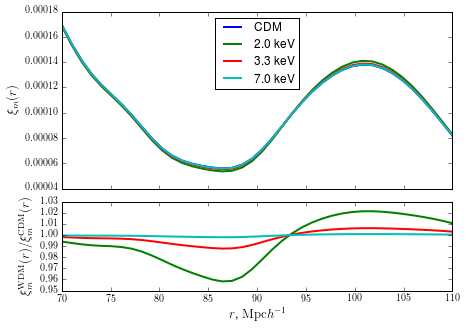

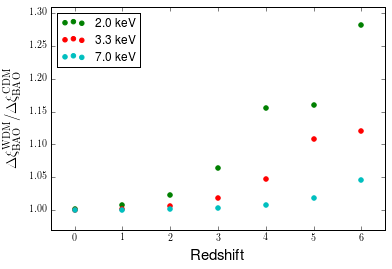

In [108]:
fig,ax = subplots(2,1,sharex=True,gridspec_kw={"height_ratios":[2,1],"hspace":0.1},
                  figsize=(7,5))

fig2,ax2 = subplots(1,1,figsize=(6,4))

cols = ['g','r','c']
for i,z in enumerate(np.arange(7)):
    hm.update(z=z)
    hm.update(wdm_mass=100000.0)
    cdm = hm.corr_mm_base
    
    min_cdm = np.min(cdm[np.logical_and(hm.r.value>80.0,hm.r.value<95.0)])
    max_cdm = np.max(cdm[np.logical_and(hm.r.value>90.0,hm.r.value<110.0)])
    cdm_diff = max_cdm - min_cdm
    for j,mx in enumerate([2.0,3.3,5.0]):
        hm.update(wdm_mass=mx)
        if i==3:
            if j==0:
                ax[0].plot(hm.r,cdm,label="CDM",lw=2,color="b")
            ax[0].plot(hm.r,hm.corr_mm_base,label="%s keV"%mx,lw=2,color=cols[j])

            ax[1].plot(hm.r,hm.corr_mm_base/cdm,lw=2,color=cols[j])

        min_wdm = np.min(hm.corr_mm_base[np.logical_and(hm.r.value>80.0,hm.r.value<95.0)])
        max_wdm = np.max(hm.corr_mm_base[np.logical_and(hm.r.value>90.0,hm.r.value<110.0)])
        wdm_diff = max_wdm - min_wdm
        
        ax2.scatter(z,wdm_diff/cdm_diff,color=cols[j],label="%s keV"%mx if i==0 else None)
        print z,mx, wdm_diff/cdm_diff
        
ax[0].set_ylabel(r"$\xi_m(r)$",fontsize=13)
ax[1].set_ylabel(r"$\xi_m^{\rm WDM}(r)/\xi_m^{\rm CDM}(r)$",fontsize=13)
ax[1].set_xlabel(r"$r$, ${\rm Mpc}h^{-1}$",fontsize=13)
ax[0].legend(loc=0)

fig.savefig("downhill_grad_figs/dmcorr.pdf")

ax2.set_ylabel(r"$\Delta \xi_{\rm BAO}^{\rm WDM}/\Delta \xi_{\rm BAO}^{\rm CDM}$",fontsize=15)
ax2.set_xlabel("Redshift",fontsize=15)
ax2.set_xlim((-0.5,6.5))
ax2.set_ylim((0.97,1.31))
ax2.legend(loc="upper left")
fig2.savefig("downhill_grad_figs/delta_dm_corr.pdf")

## Choice of M_min limits, angular res. etc.

Our aim is to find the smallest $M_{\rm min}$ that is possible for a given $M_{\star,{\rm min}}$ at a give redshift, and also the $r_p$ that corresponds to a given angular resolution.

In [148]:
from astropy.cosmology import Planck13

def get_M0(z,M0_0,z0):
    return M0_0 * Planck13.luminosity_distance(z)**2/Planck13.luminosity_distance(z0)**2

def ms_to_mh_behroozi(ms,m1=10.72,m1_a=0.55,m0=12.35,m0_a=0.28,beta=0.44,
                      beta_a=0.18,delta=0.57,delta_a=0.17,gamma=1.56,gamma_a=2.51,
                      z=0):
    # Get evolution of parameters
    a=1./(1.+z)
    m1 += m1_a*(a-1)
    m0 += m0_a*(a-1)
    beta += beta_a*(a-1)
    delta += delta_a*(a-1)
    gamma += gamma_a*(a-1)

    logx = ms - m1
    x = 10**logx
    return m0 + beta*logx + x**delta/(1+x**-gamma) - 0.5

def get_mmin_z(z,m0_0,z0):
    m0 = np.log10(get_M0(z,m0_0,z0).value)
    return ms_to_mh_behroozi(m0,z=z)

def get_rp_z(z,r0,z0):
    return r0*Planck13.angular_diameter_distance(z)/Planck13.angular_diameter_distance(z0)

## Small-Scale

In [5]:
wp.rlog=True
wp.update(rp_min=0.01,rp_max=1.0,rp_num=40.0,rnum=80)

First, define all the functions for using wp:

In [163]:
def get_data(z,rmin,rmax,mx,mmin):
    wp.update(z=z,rp_min=rmin,rp_max=rmax,wdm_mass=mx,hod_params=get_hod(mmin,z))
    return wp.projected_corr_gal, wp.mean_gal_den

def get_inputs(mmin,nbar,sd,z):
    priors = [Normal("hod_params:M_1",mmin+1.2-z/10.,sd),
              Normal("hod_params:alpha",1.0,0.2*sd)]
    guess = [mmin+1.2-z/10.0,1.0]
    return priors, guess

def fit_mmin(z,rmin,rmax,mx,mmin,sd):
    data,nbar = get_data(z,rmin,rmax,mx,mmin)
    priors, guess = get_inputs(mmin,nbar,sd,z)

    m = Minimize(priors,data,"projected_corr_gal",{},data/10.0,blobs=[],guess=guess,relax=True)
    wp.update(wdm_mass=100000.0,ng=nbar.value)
    return m.fit(wp,bounds=[(guess[0]-2*sd,guess[0]+2*sd),(guess[1]-0.4*sd,guess[1]+0.4*sd)],disp=True),data
    
def get_maxdiff(data,res):
    hm.update(hod_params={"M_1":res[0],"alpha":res[1]},wdm_mass=100000.0)
    return np.max(np.abs(data/wp.projected_corr_gal-1))

def decide_mmin(z,rmin,rmax,mx,mmin,sd):
    result,data = fit_mmin(z,rmin,rmax,mx,mmin,sd)
    maxdiff = get_maxdiff(data,result.x)
    return maxdiff,result,data

def find_sig_mmin(z,rmin,rmax,mx,start,end,num):
    mmins = np.linspace(start,end,num)
    print mmins
    for i,mmin in enumerate(mmins):
        try:
            md,res,data = decide_mmin(z,rmin,rmax,mx,mmin,sd=1.0)
        except:
            continue
            
        if np.isnan(md):
            print mmin, " returned NaN, probably because of Mmin: ", wp.hod.mmin
            continue
        yield mmin,md,res,data,wp.projected_corr_gal




In [217]:
def plot_resids(z,rmin,rmax,mx):
    mmins = results_trans[string("mmin",mx,z,rmin,rmax)]
    datas = results_trans[string("data",mx,z,rmin,rmax)]
    fits = results_trans[string("fit",mx,z,rmin,rmax)]
    for i,(m,d,f) in enumerate(zip(mmins,datas,fits)):
        plot(logspace(log10(rmin),log10(rmax),40.0),d/f,label=r"$M_{\rm min} = %.2f$"%m)
        
    xscale('log')
    legend(loc=0)
    
def plot_abs(z,rmin,rmax,mx):
    mmins = results_trans[string("mmin",mx,z,rmin,rmax)]
    datas = results_trans[string("data",mx,z,rmin,rmax)]
    fits = results_trans[string("fit",mx,z,rmin,rmax)]
    colors=['b',"g",'r','c','k','m','y']
    for i,(m,d,f) in enumerate(zip(mmins,datas,fits)):
        plot(logspace(log10(rmin),log10(rmax),40.0),d,label=r"$M_{\rm min} = %.2f$"%m,color=colors[i])
        plot(logspace(log10(rmin),log10(rmax),40.0),f,color=colors[i],ls="--")
        
    yscale('log')
    xscale('log')
    legend(loc=0)
    
def string(bit,mx,z,rmin,rmax):
    return bit+"_%dkev_%d_r%d_%s"%(mx,z,log10(rmin),"1h" if rmax==1.0 else "trans")

In [164]:
results_trans = {}
for im,mx in enumerate([2.0,3.3,5.0]):
    for iz,z in enumerate([0.05,1.0,2.0,3.0,4.0,5.0]):
        for ir,rmin in enumerate([0.001,0.01]):
            for ir2, rmax in enumerate([1.0,40.0]):
                print mx,z,rmin,rmax
                
                mmin = get_mmin_z(z,5e5,0.05)
                rp_min = get_rp_z(z,r,0.05)
                mmax = mmin + 3.0

                # The following checks the number of halos approximately in the redshift volume
                #wp.update(hod_params={"M_min":mmin},wdm_mass=mx)
                #print mx, z, mmin,rp_min,wp.ngtm[0],wp.ngtm[0]*(Planck13.comoving_volume(z+0.5)-Planck13.comoving_volume(max(z-0.5,0)))

                for bit in ["mmin","md","res","data","fit"]:
                    results_trans[string(bit,mx,z,rmin,rmax)] = []

                for i,x in enumerate(find_sig_mmin(z=z,rmin=rmin,rmax=rmax,mx=mx,start=mmin,end=mmax,num=7)):
                    for j,bit in enumerate(["mmin","md","res","data","fit"]):
                        results_trans[string(bit,mx,z,rmin,rmax)].append(x[j])
                    
                    %store results_trans
            

2.0 0.05 0.001 1.0
[  9.68175019  10.18175019  10.68175019  11.18175019  11.68175019
  12.18175019  12.68175019]
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
2.0 0.05 0.001 40.0
[  9.68175019  10.18175019  10.68175019  11.18175019  11.68175019
  12.18175019  12.68175019]
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
2.0 0.05 0.01 1.0
[  9.68175019  10.18175019  10.68175019  11.18175019  11.68175019
  12.18175019  12.68175019]
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
Stored 'results_trans' (dict)
2.0 0.05 0.01 40.0
[  9.6817501

/Users/Steven/anaconda/lib/python2.7/site-packages/halomod/halo_model.py:668: RuntimeWarning: invalid value encountered in greater
  


#### z=1, r=-3

In [41]:
mmin_2kev_1_1h_r3 = []
md_2kev_1_1h_r3 = []
res_2kev_1_1h_r3 = []
data_2kev_1_1h_r3 = []
fit_2kev_1_1h_r3 = []
for i,(mmin,md,res,data,fit) in enumerate(find_sig_mmin(z=1.0,rmin=0.001,rmax=1.0,mx=2.0)):
    mmin_2kev_1_1h_r3.append(mmin)
    md_2kev_1_1h_r3.append(md)
    res_2kev_1_1h_r3.append(res)
    data_2kev_1_1h_r3.append(data)
    fit_2kev_1_1h_r3.append(fit)
    if md>0.2:
        break
    %store mmin_2kev_1_1h_r3
    %store md_2kev_1_1h_r3
    %store res_2kev_1_1h_r3
    %store data_2kev_1_1h_r3
    %store fit_2kev_1_1h_r3

11.0 0.0595835390743 [ 12.13591904   1.03659607] True
10.5 0.0888858653164 [ 11.66752642   1.04665102] True
10.0 0.111678134876 [ 11.20469783   1.0545833 ] True
9.5 0.12356082479 [ 10.74127166   1.05888927] True
9.0 0.125951695323 [ 10.2662493    1.05729393] False
8.5 0.115510129936 [ 9.76340563  1.04744977] True


NGException: Maximum mean galaxy density exceeded: 21.8539446161

In [226]:
def final_plot():
    colors=['g','r','c']
    markers = ["o","<",">","^","v","s","*"]
    fill = ["full","none"]
    s=60
    marker_handles = []
    fill_handles = []
    color_handles = []
    
    fig, ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12,5),subplot_kw={"xlim":(9.5,14.8),"ylim":(0,0.4)},
                          gridspec_kw={"wspace":0.})
    
    for iz, z in enumerate(np.arange(6)):
        marker_handles.append(scatter(-1,-1,marker=markers[iz],color="k",s=s/2))
        
        for ir, rmin in enumerate([0.01,0.001]):
            if iz==0:
                fill_handles.append(scatter(-1,-1,marker="o",facecolor="none" if ir else "k",s=s))
            
            for im, mx in enumerate([2.0,3.3,5.0]):
                if iz==0 and ir==0:
                    color_handles.append(scatter(-1,-1,marker="o",color=colors[im],s=s))
                
                for irmax,rmax in enumerate([1.0,4.0]):
                    mds = results_trans[string("md",mx,z,rmin,rmax)]
                    mmins = results_trans[string("mmin",mx,z,rmin,rmax)]
                    ax[irmax].scatter(mmins,mds,marker=markers[iz],facecolor="none" if ir else colors[im],color=colors[im],s=s)
                    ax[irmax].plot(mmins,mds,color=colors[im],lw=2)
                
    l1 = ax[0].legend(marker_handles,["%d"%(zz) for zz in np.arange(6) ],loc="upper left",ncol=2,title=r"$\mathbf{z}$")
    setp(l1.get_title(),fontsize='17',color="slateblue")
    #ax[0].add_artist(l1)
    l2 = legend(fill_handles,["-%d"%rr for rr in (2,3)],loc="upper right",ncol=2,title=r"$\mathbf{\log_{10}r_{\rm min}}$")
    setp(l2.get_title(),fontsize='17',color="slateblue")
    ax[1].add_artist(l2)
    l3 = ax[1].legend(color_handles,[r"%s"%mx for mx in [2.0,3.3,5.0]],loc="upper left",ncol=2,title=r"$\mathbf{m_{\rm WDM}}$")
    setp(l3.get_title(),fontsize='17',color="slateblue")
    
    for i in range(2):
        ax[i].axhline(0.1,ls="--",color="k")
        ax[i].axhline(0.2,ls="--",color="k")
        ax[i].set_xlabel(r"$\log_{10} \frac{M_{\rm min}}{h^{-1}M_\odot}$",fontsize=17)
        
    ax[0].set_ylabel("Maximum Deviation",fontsize=17)
    
    savefig("downhill_grad_figs/final_results_1h_trans.pdf")

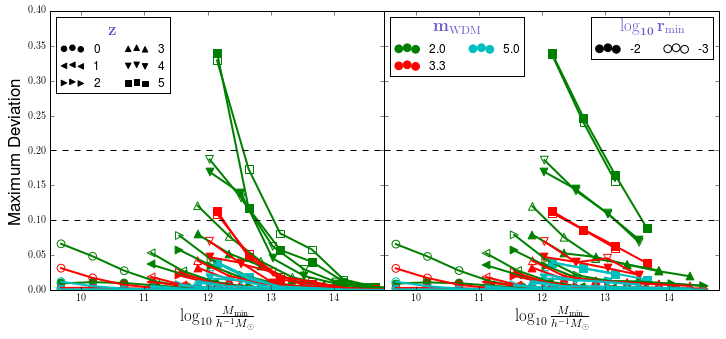

In [234]:
final_plot()

In [199]:
print results_trans['md_2kev_0_r-3_1h']
print results_trans['md_2kev_0_r-3_trans']

[<Quantity 0.0661840056517452>, <Quantity 0.04828317206232513>, <Quantity 0.02761556940840948>, <Quantity 0.012185984721068466>, <Quantity 0.00438737715735682>, <Quantity 0.0013924003553924535>, <Quantity 0.0004160556455150566>]
[<Quantity 0.06572145051465694>, <Quantity 0.04807444549620177>, <Quantity 0.027763989039422454>, <Quantity 0.012185536926908935>, <Quantity 0.004381579692938509>, <Quantity 0.0013758383674213892>, <Quantity 0.0006728142585592511>]


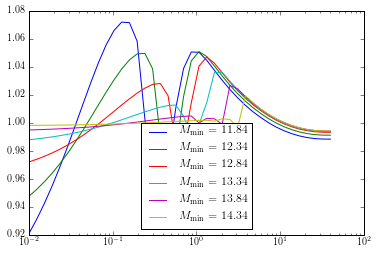

In [218]:
plot_resids(3,0.01,40.0,2.0)

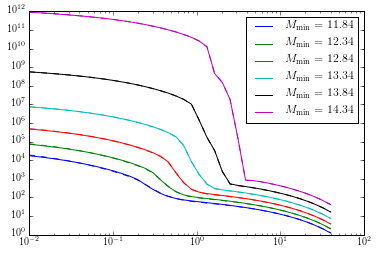

In [219]:
plot_abs(3,0.01,40.0,2.0)

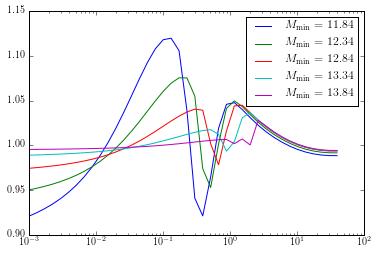

In [220]:
plot_resids(3,0.001,40.0,2.0)

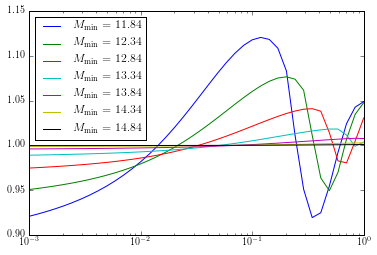

In [223]:
plot_resids(3,0.001,1.0,2.0)

In [211]:
result = results_trans[string("res",2.0,3,0.01,40.0)][0]

In [212]:
result

  status: 0
 success: True
    nfev: 39
     fun: 159.40202700634782
       x: array([ 12.71082908,   1.13661023])
 message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     jac: array([-0.00082991, -0.00022453])
     nit: 8

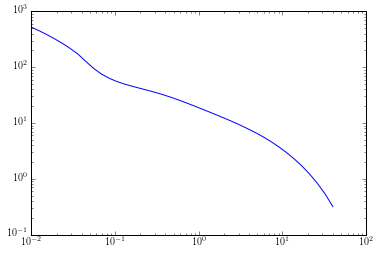

In [216]:
wp.update(wdm_mass=2.0,rp_min=0.01,rp_max=40.0,hod_params={"M_min":9.68,"M_1":10.88,"alpha":1.0})
plot(wp.rp,wp.projected_corr_gal)
xscale('log')
yscale('log')

In [235]:
def final_plot_cons():
    colors=['g','r','c']
    markers = ["o","<",">","^","v","s","*"]
    fill = ["full","none"]
    s=60
    marker_handles = []
    fill_handles = []
    color_handles = []
    
    fig, ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12,5),subplot_kw={"xlim":(9.5,14.8),"ylim":(0,0.25)},
                          gridspec_kw={"wspace":0.})
    
    for iz, z in enumerate(np.arange(6)):
        marker_handles.append(scatter(-1,-1,marker=markers[iz],color="k",s=s/2))
        
        for ir, rmin in enumerate([0.01,0.001]):
            if iz==0:
                fill_handles.append(scatter(-1,-1,marker="o",facecolor="none" if ir else "k",s=s))
            
            for im, mx in enumerate([2.0,3.3,5.0]):
                if iz==0 and ir==0:
                    color_handles.append(scatter(-1,-1,marker="o",color=colors[im],s=s))
                
                for irmax,rmax in enumerate([1.0,4.0]):
                    fits = results_trans[string("fit",mx,z,rmin,rmax)]
                    datas = results_trans[string("data",mx,z,rmin,rmax)]                   
                    mmins = results_trans[string("mmin",mx,z,rmin,rmax)]
                    devs = [np.abs(f[0]/d[0]-1) for f,d in zip(fits,datas)]
                    
                    ax[irmax].scatter(mmins,devs,marker=markers[iz],facecolor="none" if ir else colors[im],color=colors[im],s=s)
                    ax[irmax].plot(mmins,devs,color=colors[im],lw=2)
                
    l1 = ax[0].legend(marker_handles,["%d"%(zz) for zz in np.arange(6) ],loc="upper left",ncol=2,title=r"$\mathbf{z}$")
    setp(l1.get_title(),fontsize='17',color="slateblue")
    #ax[0].add_artist(l1)
    l2 = legend(fill_handles,["-%d"%rr for rr in (2,3)],loc="upper right",ncol=2,title=r"$\mathbf{\log_{10}r_{\rm min}}$")
    setp(l2.get_title(),fontsize='17',color="slateblue")
    ax[1].add_artist(l2)
    l3 = ax[1].legend(color_handles,[r"%s"%mx for mx in [2.0,3.3,5.0]],loc="upper left",ncol=2,title=r"$\mathbf{m_{\rm WDM}}$")
    setp(l3.get_title(),fontsize='17',color="slateblue")
    
    for i in range(2):
        ax[i].axhline(0.1,ls="--",color="k")
        ax[i].axhline(0.2,ls="--",color="k")
        ax[i].set_xlabel(r"$\log_{10} \frac{M_{\rm min}}{h^{-1}M_\odot}$",fontsize=17)
        
    ax[0].set_ylabel(r"Deviation at $r_{p,{\rm min}}$",fontsize=17)
    
    savefig("downhill_grad_figs/final_results_cons.pdf")

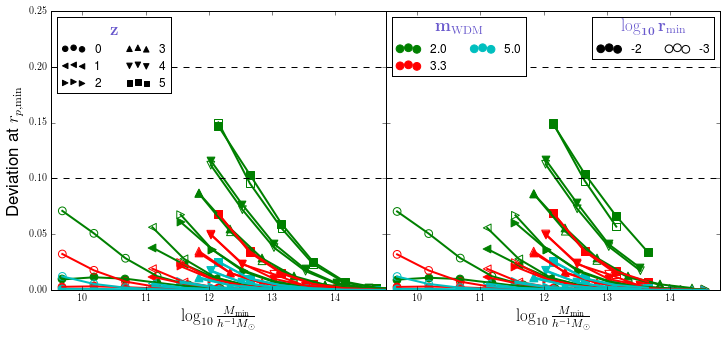

In [236]:
final_plot_cons()

In [237]:
1-1./1.686

0.4068801897983393